In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fft as fft
from scipy.interpolate import interp1d

In [3]:
mpk = np.genfromtxt(r'C:/Users/satvi/PhD_thesis/kk.dat')

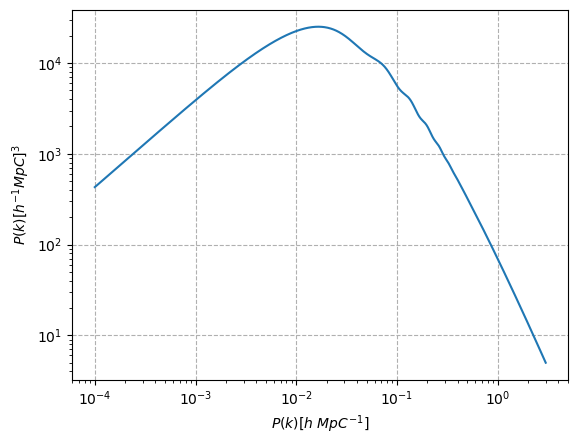

In [4]:
plt.plot(mpk[:,0],mpk[:,1])
plt.grid(linestyle = "dashed")
plt.ylabel('$P(k) [h^{-1}MpC]^3$')
plt.xlabel('$P(k) [h~MpC^{-1}]$')
plt.yscale('log')
plt.xscale('log')

In [6]:
interpolation_func = interp1d(mpk[:,0], mpk[:,1], kind='linear')

In [7]:
np.set_printoptions(linewidth=400)
np.set_printoptions(precision=4)
def distance1(length,cx,cy):
    l_by_2 = int(length/2)
    
    x_val = np.linspace(0,l_by_2*np.pi,l_by_2)+2*np.pi  #creating uniform x grid
    
    x_val_fft = np.concatenate([x_val[::-1],-x_val])
    
    xx, yy = np.meshgrid(x_val_fft, x_val_fft, indexing='ij')
    xx = np.roll(xx, shift = -l_by_2+cx, axis=0)
    yy = np.roll(yy, shift = -l_by_2+cy, axis=1)
    
    kxx = 2*np.pi/xx
    kyy = 2*np.pi/yy
    
    dist = np.zeros((length,length))
    for i in range(length):
        for j in range(length):
            dist[i,j] = np.sqrt((xx[i,j])**2 + (yy[i,j])**2)
    #dist = dist + 2*np.pi # to avoid division by zero
    return x_val_fft, kxx,kyy, dist



In [8]:
def pk_whitenoise(length):
    cx = int(length/2)
    cy=cx
    white_noise = np.random.normal(loc=0,scale=1,size=length**2).reshape(length,length)
    
    x_val_fft = distance1(length,cx,cy)[0]
    kxx = distance1(length,cx,cy)[1]
    kyy = distance1(length,cx,cy)[2]
    
    k_grid = np.zeros((length,length))
    
    for i in range(length):
        for j in range(length):
            k_grid[i,j] = np.sqrt(kxx[i,j]**2 + kyy[i,j]**2)
        
    del_k = interpolation_func(k_grid)    #Power spectra values for the k grid           

    white_noise_fft = np.fft.fft2(white_noise,norm='backward')
    
    #convolute in k space

    delta_k_conv = white_noise_fft * np.sqrt(del_k)
    delta_k_conv[0,0] = 0   #setting dc component to zero
    
    return delta_k_conv, k_grid

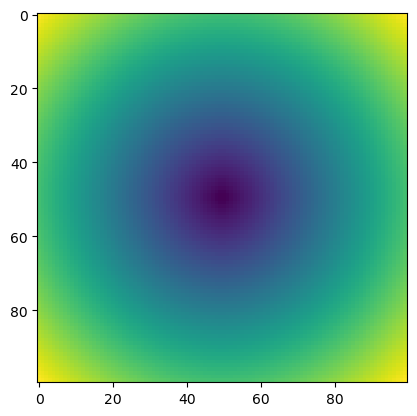

In [9]:
plt.imshow(distance1(100,50,50)[3])
# plt.savefig("example_distance.png")

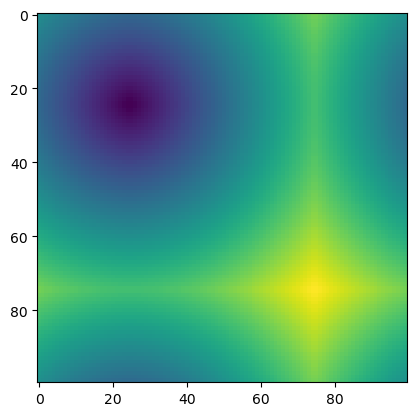

In [10]:
plt.imshow(distance1(100,25,25)[3])

In [261]:
length = 100
delta_k_conv = pk_whitenoise(length)[0]
delta_x_conv = np.fft.ifft2(delta_k_conv)
delta_x_trunc = delta_x_conv    #length is 49 and not 50
delta_x_flat=delta_x_trunc.flatten()
delta_x_flat.shape

(10000,)

In [50]:
# l_by_2 = int(length/2)
# distmax = np.max(distance1(length,l_by_2,l_by_2)[3])
# distmin = np.min(distance1(length,l_by_2,l_by_2)[3])

# bins = int(distmax/distmin)

# pk = np.zeros(bins)
# pk_sample = np.zeros(bins)
# for i in range(length-1):
#     print(i)
#     for j in range(length-1):   #due to truncation of zero row and column
        

#         dist = distance1(length,i,j)[3]
        
#         for m in range(length-1):
#             for n in range(length-1):
#                 f = int(dist[m,n]/distmin)-1
#                 pk[f] = pk[f] + delta_x_trunc[m,n].real * delta_x_trunc[i,j].real
#                 pk_sample[f] = pk_sample[f] + 1

l_by_2 = int(length/2)
distmax = np.max(distance1(length,l_by_2,l_by_2)[3])
distmin = np.min(distance1(length,l_by_2,l_by_2)[3])
distance = distance1(length,l_by_2,l_by_2)[3]
bins = int(distmax/distmin)

pk = np.zeros(bins)
pk_sample = np.zeros(bins)
for i in range(length):
    print(i)
    for j in range(length):   #due to truncation of zero row and column
        
        d = np.roll(np.roll(distance, shift = -l_by_2+i, axis=0),shift = -l_by_2+j, axis=1)
        f = (d.flatten()/distmin).astype(int)-1
        
        for i in range(bins):
            pk[i] = pk[i] + np.sum(delta_x_trunc[i,j].real * delta_x_flat[f==i].real)
            pk_sample[i] = pk_sample[i] + np.sum(f==i)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [52]:
xar = np.linspace(distmin*0.5,distmax-distmin/2,bins)
kar = 2*np.pi/xar
mpk = np.genfromtxt(r'C:/Users/satvi/PhD_thesis/kk.dat')
plt.scatter(kar[1:12], np.abs(test[1:12])/(kar[1:12])**2/6.3,s=5)
plt.plot(mpk[:,0],mpk[:,1])
plt.grid(linestyle = "dashed")
plt.ylabel('$P(k) [h^{-1}MpC]^2$')
plt.xlabel('$k [h~MpC^{-1}]$')
plt.title("2d from correlation")
# plt.savefig("Pkz_0_2d_kxspace")
plt.xscale('log')
plt.yscale('log')

NameError: name 'test' is not defined

In [215]:
xar = np.linspace(distmin*0.5,distmax-distmin/2,bins)
# xar = np.linspace(distmin,distmax-distmin/2,bins)
pk_avg = pk/pk_sample

test = np.fft.fft(pk_avg)


In [ ]:
mpk = np.genfromtxt(r'C:/Users/satvi/PhD_thesis/kk.dat')
plt.scatter(2*np.pi/xar[1:], np.abs(test[1:]),s=10)
plt.plot(mpk[:,0],mpk[:,1])
plt.grid(linestyle = "dashed")
plt.ylabel('$P(k) [h^{-1}MpC]^2$')
plt.xlabel('$k [h~MpC^{-1}]$')
plt.title("2d from correlation")
# plt.savefig("Pkz_0_2d_kxspace")
plt.xscale('log')
plt.yscale('log')
# plt.savefig("pkz_0correlation2d,")

# 3d correlations

In [14]:
np.set_printoptions(linewidth=400)
np.set_printoptions(precision=4)
def distance3d(length,cx,cy,cz):
    l_by_2 = int(length/2)
    
    x_val = np.linspace(0,l_by_2*np.pi,l_by_2)+1.5*np.pi  #creating uniform x grid
    
    x_val_fft = np.concatenate([x_val[::-1],-x_val])
    
    xx, yy, zz = np.meshgrid(x_val_fft, x_val_fft, x_val_fft, indexing='ij')
    xx = np.roll(xx, shift = -l_by_2+cx, axis=0)
    yy = np.roll(yy, shift = -l_by_2+cy, axis=1)
    zz = np.roll(yy, shift = -l_by_2+cz, axis=2)
    
    kxx = 2*np.pi/xx
    kyy = 2*np.pi/yy
    kzz = 2*np.pi/zz
    
    dist = np.zeros((length,length,length))
    for i in range(length):
        for j in range(length):
            for k in range(length):
                dist[i,j,k] = np.sqrt((xx[i,j,k])**2 + (yy[i,j,k])**2 + zz[i,j,k]**2)
    #dist = dist + 2*np.pi # to avoid division by zero
    return x_val_fft, kxx,kyy, kzz, dist



In [15]:
def pk_whitenoise3d(length):
    cx = int(length/2)
    cy=cx
    cz=cx
    white_noise = np.random.normal(loc=0,scale=1,size=length**3).reshape(length,length,length)
    
    x_val_fft = distance1(length,cx,cy)[0]
    kxx = distance3d(length,cx,cy,cz)[1]
    kyy = distance3d(length,cx,cy,cz)[2]
    kzz = distance3d(length,cx,cy,cz)[3]
    dist= distance3d(length,cx,cy,cz)[4]
    
    k_grid = np.zeros((length,length,length))
    
    for i in range(length):
        for j in range(length):
            for k in range(length):
                k_grid[i,j,k] = np.sqrt(kxx[i,j,k]**2 + kyy[i,j,k]**2 + kzz[i,j,k]**2)
        
    del_k = interpolation_func(k_grid)    #Power spectra values for the k grid           

    white_noise_fft = np.fft.fftn(white_noise,norm='backward')
    
    #convolute in k space

    delta_k_conv = white_noise_fft * np.sqrt(del_k)
    delta_k_conv[0,0,0] = 0   #setting dc component to zero
    
    return delta_k_conv, k_grid

In [ ]:
plt.distance1

In [254]:
length = 50
l_by_2=int(length/2)
delta_k_conv = pk_whitenoise3d(length)[0]
delta_x_conv = np.fft.ifftn(delta_k_conv)
delta_x_trunc = delta_x_conv[1:,1:,1:]
delta_k_back = np.fft.fftn(delta_x_conv)

Text(0.5, 1.0, '2d slice of a 3d box of overdensity field')

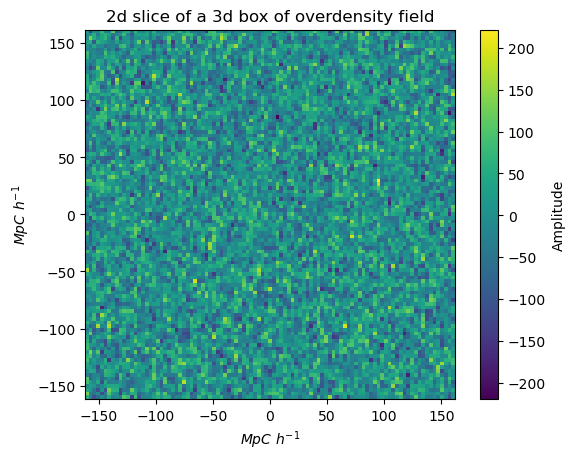

In [257]:
x_val = distance3d(length,l_by_2,l_by_2,l_by_2)[0]
distmax = np.max(x_val)

plt.imshow((delta_x_trunc[:,10,:].real), extent=[-distmax,distmax, -distmax, distmax],cmap='viridis', origin='lower')
plt.colorbar(label='Amplitude')  # Add a colorbar with label
plt.xlabel('$MpC~h^{-1}$')  # x-axis label (if you have x-axis values)
plt.ylabel('$MpC~h^{-1}$')  # y-axis label (if you have y-axis values)
plt.title("2d slice of a 3d box of overdensity field")
# plt.savefig("overdensity field slice")

(array([2.0000e+00, 0.0000e+00, 0.0000e+00, 3.0000e+00, 4.0000e+00, 7.0000e+00, 1.1000e+01, 1.0000e+01, 1.9000e+01, 2.4000e+01, 3.1000e+01, 5.6000e+01, 7.1000e+01, 9.2000e+01, 1.3200e+02, 1.4400e+02, 2.2500e+02, 2.8900e+02, 4.2300e+02, 5.2900e+02, 7.9400e+02, 9.2200e+02, 1.2550e+03, 1.5370e+03, 1.9540e+03, 2.4710e+03, 3.0220e+03, 3.7440e+03, 4.5220e+03, 5.3890e+03, 6.6420e+03, 7.8070e+03,
        8.9740e+03, 1.0452e+04, 1.2196e+04, 1.3856e+04, 1.5621e+04, 1.7705e+04, 1.9975e+04, 2.1790e+04, 2.3673e+04, 2.5907e+04, 2.8046e+04, 2.9675e+04, 3.1617e+04, 3.2797e+04, 3.3925e+04, 3.5014e+04, 3.5668e+04, 3.5873e+04, 3.6364e+04, 3.5906e+04, 3.5235e+04, 3.4836e+04, 3.3691e+04, 3.2420e+04, 3.0444e+04, 2.9096e+04, 2.6808e+04, 2.5163e+04, 2.2884e+04, 2.0962e+04, 1.8866e+04, 1.6906e+04,
        1.4921e+04, 1.3120e+04, 1.1398e+04, 9.8340e+03, 8.4080e+03, 7.1270e+03, 5.9290e+03, 5.0360e+03, 4.0450e+03, 3.2820e+03, 2.7280e+03, 2.1770e+03, 1.8090e+03, 1.4500e+03, 1.0810e+03, 8.8500e+02, 6.2200e+02, 5.05

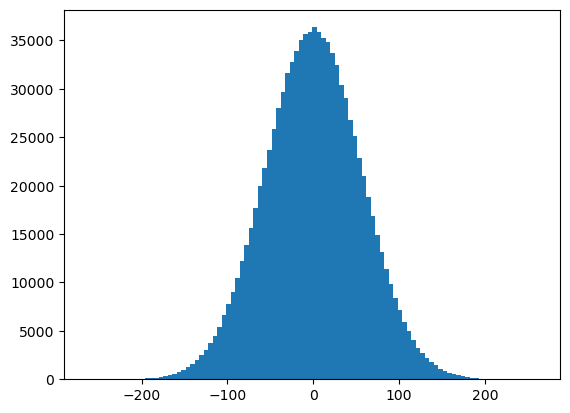

In [248]:
plt.hist(delta_x_trunc.real.flatten(),bins=100)

In [229]:
# k_val_conv = pk_whitenoise(length)[0][1:,1:]
k_grid = pk_whitenoise3d(length)[1]
    
kgrid_flat = (k_grid).flatten()
deltakconvflat = delta_k_back.flatten()
    
kspace = np.logspace(np.log10(kgrid_flat.min()),np.log10(kgrid_flat.max()),l_by_2)
pk = np.zeros((l_by_2))
for i in range(0,l_by_2-1):
    cond = (kgrid_flat >=kspace[i]) & (kgrid_flat<kspace[i+1])
    pk[i] = (np.abs(deltakconvflat[cond])**2).sum()/len( deltakconvflat[cond] )


C:\Users\satvi\AppData\Local\Temp\ipykernel_13012\2800631248.py:11: RuntimeWarning: invalid value encountered in double_scalars
  pk[i] = (np.abs(deltakconvflat[cond])**2).sum()/len( deltakconvflat[cond] )


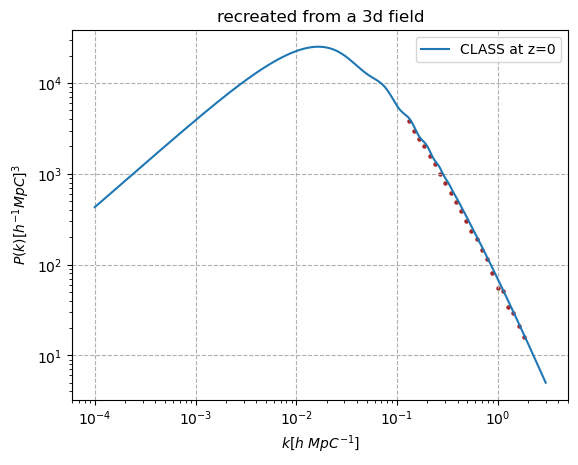

In [23]:
plt.scatter(kspace,pk/length**3,s=5,c='brown')
plt.plot(mpk[:,0],mpk[:,1],label="CLASS at z=0")
plt.grid(linestyle = "dashed")
plt.ylabel('$P(k) [h^{-1}MpC]^3$')
plt.xlabel('$k [h~MpC^{-1}]$')

# plt.errorbar(kspace[1:l], pk_mean[1:], yerr=pk_std[1:], fmt='--^', label='Data', linewidth=0.5,markersize=2.0)
plt.title("recreated from a 3d field")
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.savefig("Pkz_0_3d_xspace")

In [25]:
delta_k_conv = pk_whitenoise3d(length)[0]
delta_x_conv = np.fft.ifftn(delta_k_conv)
delta_x_trunc = delta_x_conv[1:,1:,1:]    #length is 49 and not 50

In [ ]:
l_by_2 = int(length/2)
distmax = np.max(distance3d(length,l_by_2,l_by_2,l_by_2)[4])
distmin = np.min(distance3d(length,l_by_2,l_by_2,l_by_2)[4])

bins = int(distmax/distmin)

pk = np.zeros(bins)
pk_sample = np.zeros(bins)
for i in range(length-1):
    print(i)
    for j in range(length-1):   #due to truncation of zero row and column
        for k in range(length-1):
        
            dist = distance3d(length,i,j,k)[4]
        
            for m in range(length-1):
                for n in range(length-1):
                    for o in range(length-1):
                        f = int(dist[m,n,o]/distmin)-1
                        pk[f] = pk[f] + delta_x_trunc[m,n,o].real * delta_x_trunc[i,j,o].real
                        pk_sample[f] = pk_sample[f] + 1

0


# Trying to speed up 3d

In [87]:
length = 50
delta_k_conv = pk_whitenoise3d(length)[0]
delta_x_conv = np.fft.ifftn(delta_k_conv)
delta_x_trunc = delta_x_conv    #length is 49 and not 50
delta_x_flat=delta_x_trunc.flatten()

In [88]:
l_by_2 = int(length/2)
distmax = np.max(distance3d(length,l_by_2,l_by_2,l_by_2)[4])
distmin = np.min(distance3d(length,l_by_2,l_by_2,l_by_2)[4])
distance = distance3d(length,l_by_2,l_by_2,l_by_2)[4]
bins = int(distmax/distmin)

pk = np.zeros(bins)
pk_sample = np.zeros(bins)
for i in range(length-1):
    print(i)
    for j in range(length-1):   #due to truncation of zero row and column
        for k in range(length-1):
                
            d = np.roll(np.roll(np.roll(distance, shift = -l_by_2+i, axis=0),shift = -l_by_2+j, axis=1),shift = -l_by_2+k, axis=2)
            f = (d.flatten()/distmin).astype(int)-1
        
            for i in range(bins):
                pk[i] = pk[i] + np.sum(delta_x_trunc[i,j,k].real * delta_x_flat[f==i].real)
                pk_sample[i] = pk_sample[i] + np.sum(f==i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48


array([12000., 12000.,  3000.])

In [89]:
xar = np.linspace(distmin*0.5,distmax-distmin/2,bins)
kar = 2*np.pi/xar
pk_avg = pk/pk_sample
test = np.fft.fft(pk_avg)

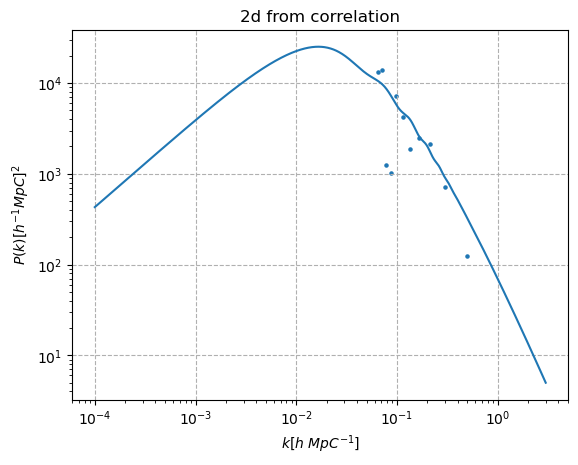

In [278]:
mpk = np.genfromtxt(r'C:/Users/satvi/PhD_thesis/kk.dat')
plt.scatter(kar[:14], np.abs(test[:14])*bins/(kar[:14])**2,s=5)
plt.plot(mpk[:,0],mpk[:,1])
plt.grid(linestyle = "dashed")
plt.ylabel('$P(k) [h^{-1}MpC]^3$')
plt.xlabel('$k [h~MpC^{-1}]$')
plt.title("3d from correlation")
# plt.savefig("Pkz_0_2d_kxspace")
plt.xscale('log')
plt.yscale('log')
# plt.savefig("pkz_0trycorrelation3d,")

In [276]:
from scipy.integrate import quad

# Define the function to be integrated using the array of values
def integrand(r,i):
    
    kval = kar[:14]
    k = kval[i]
    corval = pk_avg[:14]
    corr = interp1d(2*np.pi/kval, corval, kind='linear')
    # Use interpolation or some other method to compute the function values at x
    # In this example, we assume you have a function y(x) defined elsewhere
#     print(r)
    y_value = np.sin(k*r)/(k*r)*corr(r)*r*r#y(x)  # Replace y(x) with your function or array of values
    return y_value

# Define the integration limits
a = min(2*np.pi/kval)
b = max(2*np.pi/kval)

# Perform the integration using quad
# result, error = quad(integrand, a, b,args=1)

print(f"Result of integration: {result}")
print(f"Estimated error: {error}")
res = np.zeros(14)
for i in range(14):
    res[i] = quad(integrand,a,b,args=i)[0]

Result of integration: -34.64678638376239
Estimated error: 0.08505906932075646


C:\Users\satvi\AppData\Local\Temp\ipykernel_12936\4029467621.py:27: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  res[i] = quad(integrand,a,b,args=i)[0]


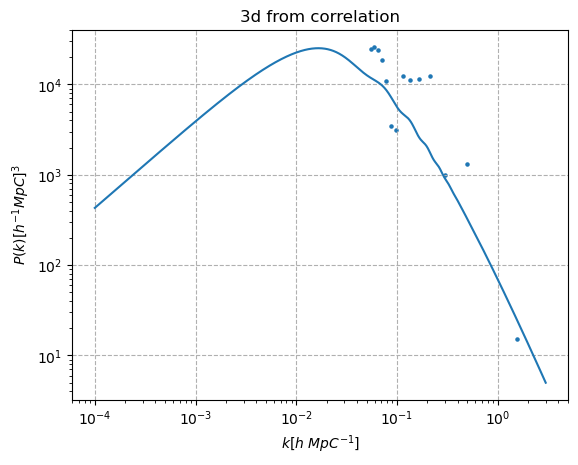

In [281]:
mpk = np.genfromtxt(r'C:/Users/satvi/PhD_thesis/kk.dat')
plt.scatter(kar[:14], np.abs(res)*2*(2*np.pi),s=5)
plt.plot(mpk[:,0],mpk[:,1])
plt.grid(linestyle = "dashed")
plt.ylabel('$P(k) [h^{-1}MpC]^3$')
plt.xlabel('$k [h~MpC^{-1}]$')
plt.title("3d from correlation")

plt.xscale('log')
plt.yscale('log')
plt.savefig("Pkz_0_3d_integral")

In [70]:
bins

17